<a href="https://colab.research.google.com/github/busrasturker/akbankmakinaogrenmesibootcamp/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Melbourne_housing_FULL.csv'
df = pd.read_csv(file_path)

file_path = '/content/drive/My Drive/Colab Notebooks/MELBOURNE_HOUSE_PRICES_LESS.csv'
df_prices = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
shape = df.shape

# Number of columns
num_columns = len(df.columns)

# Size of the dataset (total number of elements)
size = df.size

#column info

shape , num_columns, size, df.columns


((34857, 21),
 21,
 731997,
 Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
        'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
        'Longtitude', 'Regionname', 'Propertycount'],
       dtype='object'))

In [ ]:
df.dtypes ,df.memory_usage ,df.index, df.count

In [ ]:
df.describe()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(34856, 21)

In [ ]:
mean_landsize = df['Landsize'].mean()
df['Landsize'].fillna(mean_landsize, inplace=True)
mean_buildingarea = df['BuildingArea'].mean()
df['BuildingArea'].fillna(mean_buildingarea, inplace=True)

z_scores_landsize = np.abs(stats.zscore(df['Landsize']))
z_scores_buildingarea = np.abs(stats.zscore(df['BuildingArea']))
z_scores_buildingarea

0        1.128098e-16
1        1.128098e-16
2        3.224991e-01
3        1.128098e-16
4        4.069011e-02
             ...     
34852    1.128098e-16
34853    2.232706e-01
34854    1.597643e-01
34855    1.128098e-16
34856    2.272397e-01
Name: BuildingArea, Length: 34856, dtype: float64

In [ ]:
z_score_threshold = 3  # You can adjust this threshold as needed
outlier_mask = (z_scores_landsize > z_score_threshold) | (z_scores_buildingarea > z_score_threshold)
df_no_outliers = df[~outlier_mask]
cleaned_shape = df_no_outliers.shape
cleaned_shape

(34782, 21)

In [ ]:
categorical_columns = df.select_dtypes(include=['object'])

for column in categorical_columns:
  df[column] = df[column].fillna(df[column].mode().iloc[0])


In [ ]:
# Plot a histogram of the "Price" column
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
numerical_columns = df.select_dtypes(include='number')

# Add the "Price" column to the selected numerical columns
numerical_columns['Price'] = df['Price']

# Create the pair plot
sns.pairplot(numerical_columns)
plt.show()

<ipython-input-62-28653df7d8a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


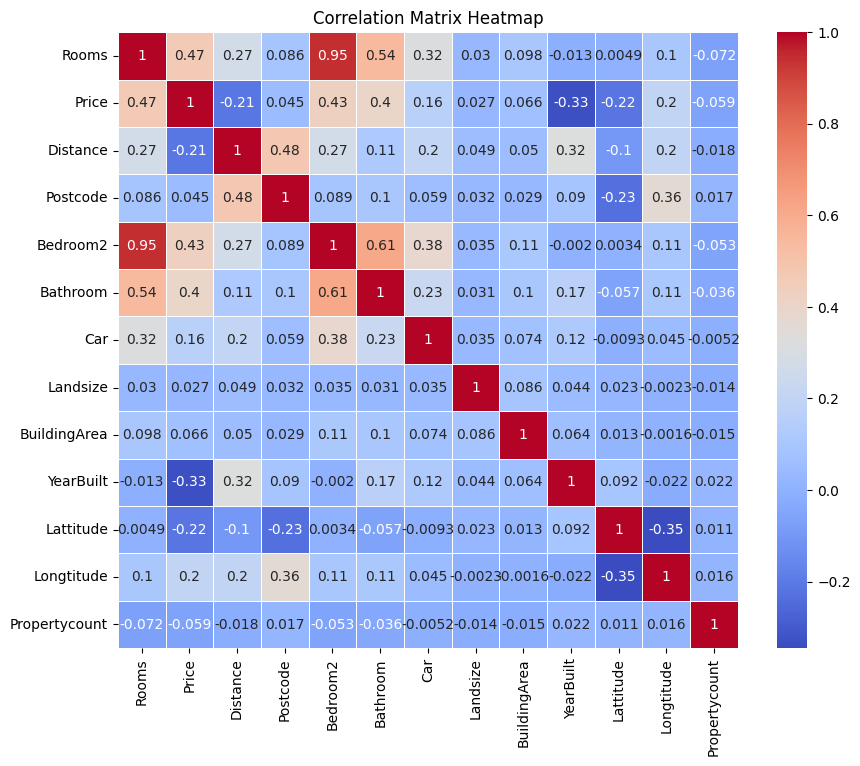

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=True, drop='first')  # Use sparse=False to get a dense array
one_hot_encoded_df = pd.DataFrame()

one_hot_encoder = OneHotEncoder(categories=[df[column].unique() for column in categorical_columns], sparse=False, drop='first')


one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_columns])
one_hot_encoded_column_names = one_hot_encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoded_column_names)

df = pd.concat([df, one_hot_encoded_df], axis=1)
